In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import math

In [2]:
def plot_samples(data,
                 n=5,
                 max_cols=5,
                 cmap="tab20"
                 ):
    n = min(len(data), n)
    if n < max_cols:
        rows = 1
        cols = n
    else:
        rows = math.ceil(n / max_cols)
        cols = max_cols
    print(f"rows: {rows}, cols: {cols}")
    fig, ax = plt.subplots(nrows=rows, ncols=cols, sharex=True, sharey=True, figsize=(20, 10))
    #ax = ax.flatten()
    index = 0
    for i in range(rows):
        for j in range(cols):
            img = data[index]
            index += 1
            #    .numpy().reshape(X.shape[1],X.shape[2],2)
            print()
            ax[i, j].imshow(img, cmap=cmap, interpolation='nearest')
            if index >= n:
                break

    #ax[0].set_xticks([])
    #ax[0].set_yticks([])
    plt.tight_layout()
    # plt.savefig('./figures/mnist_all.png', dpi=300)
    plt.show()

In [4]:
(mnist_images, mnist_labels), (mnist_images_test, mnist_labels_test) = keras.datasets.mnist.load_data()
mnist_images.shape

(60000, 28, 28)

In [5]:
mnist_images[0, 0, :]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [17]:
X_train = tf.cast(mnist_images / 255, tf.float32)
y_train = tf.cast(mnist_labels, tf.int64)
y_train

<tf.Tensor: shape=(60000,), dtype=int64, numpy=array([5, 0, 4, ..., 5, 6, 8])>

In [7]:
X_test = tf.cast(mnist_images_test / 255, tf.float32)
y_test = tf.cast(mnist_labels_test, tf.int64)

rows: 4, cols: 5






















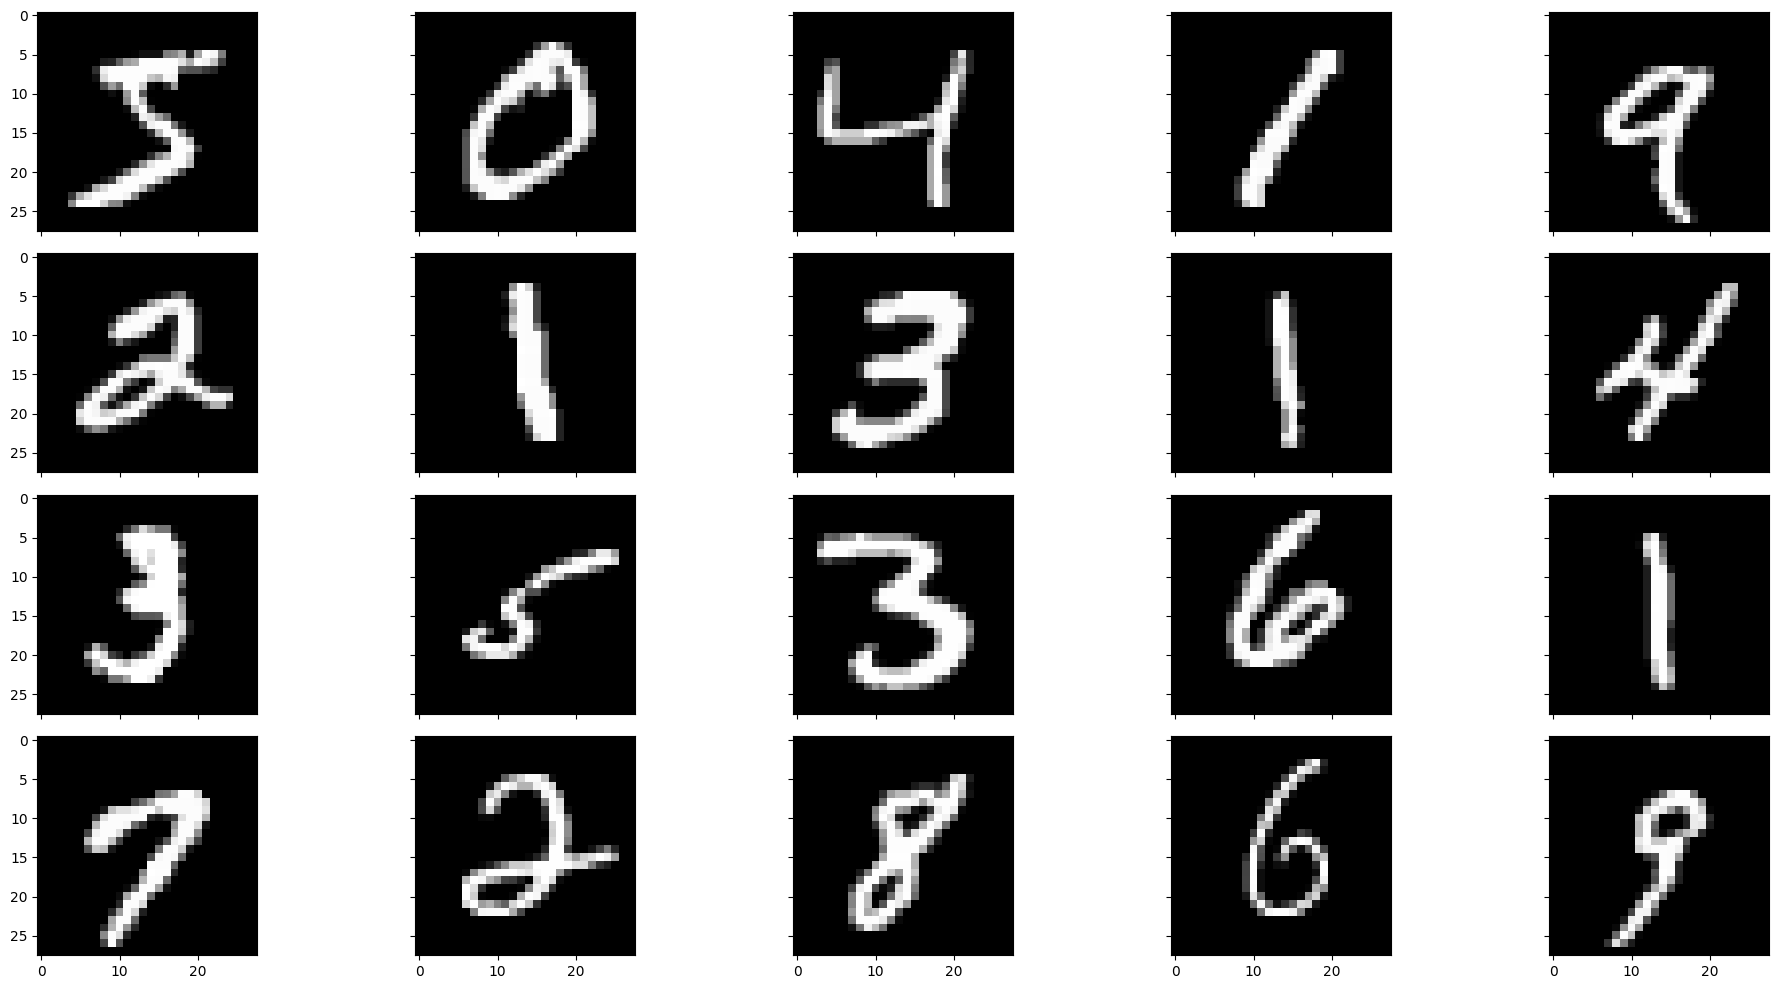

In [8]:
plot_samples(X_train, n=20, cmap="grey")

In [21]:
y_true = tf.constant([1, 2, 3], dtype=tf.int32)
y_1 = tf.constant([1, 0, 3], dtype=tf.int32)
y_pred = tf.one_hot(y_true, depth=10, dtype=tf.float32)
y_pred

<tf.Tensor: shape=(3, 10), dtype=float32, numpy=
array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [22]:
keras.losses.sparse_categorical_crossentropy(y_1, y_pred)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([9.5367386e-07, 1.6118095e+01, 9.5367386e-07], dtype=float32)>

In [83]:
base_model = keras.Sequential(
        [
                keras.layers.Input(shape=[28, 28]),
                keras.layers.Flatten(),
                #                keras.layers.Flatten(input_shape=(28, 28)),
                keras.layers.Dense(10, activation="softmax", name="output"),
                ]
        )
optimizer = keras.optimizers.Adam(learning_rate=0.02)
base_model.compile(
        loss=keras.losses.sparse_categorical_crossentropy,
        optimizer=optimizer,
        # optimizer="adam",
        metrics=["accuracy"]
        )
base_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 output (Dense)              (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(gpus))

Num GPUs Available:  1


In [47]:
base_model.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
 30/938 [..............................] - ETA: 3s - loss: 0.7242 - accuracy: 0.7656

2025-03-21 10:31:37.017216: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


938/938 [==============================] - 3s 3ms/step - loss: 0.3994 - accuracy: 0.8921
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3746 - accuracy: 0.9054
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3723 - accuracy: 0.9075
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3639 - accuracy: 0.9100
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3703 - accuracy: 0.9076
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3620 - accuracy: 0.9112
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3651 - accuracy: 0.9100
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3621 - accuracy: 0.9113
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3671 - accuracy: 0.9110
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3584 - accuracy: 0.9128


In [29]:
test_loss, test_acc = base_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")


313/313 [==============================] - 1s 3ms/step - loss: 0.5609 - accuracy: 0.9021
Test Loss: 0.5608651041984558, Test Accuracy: 0.9021000266075134


In [38]:
base_model.predict(X_train[:4]).shape

1/1 [==============================] - 0s 10ms/step


(4, 10)

In [33]:
X_train[100].shape

TensorShape([28, 28])

In [36]:
X_train[:4].shape

TensorShape([4, 28, 28])

In [88]:
y_pred = base_model.predict(X_train[1:4])
print(y_pred)
tf.argmax(y_pred[0])

1/1 [==============================] - 0s 25ms/step
[[0.06965258 0.02799898 0.2713991  0.07161994 0.09279213 0.18262482
  0.06321965 0.1167042  0.05564934 0.04833926]
 [0.10383712 0.11180507 0.12559295 0.07890783 0.05344883 0.09836313
  0.13004263 0.11298154 0.06887067 0.11615027]
 [0.1477163  0.09721813 0.12613042 0.08625969 0.07928362 0.05741163
  0.07398614 0.1118874  0.16341104 0.05669562]]


<tf.Tensor: shape=(), dtype=int64, numpy=2>

In [52]:
model = keras.Sequential(
        [
                keras.layers.Input(shape=[28, 28]),
                keras.layers.Flatten(name="input_layer"),
                keras.layers.Dense(20, activation="relu", name="hidden_layer"),
                keras.layers.Dense(10, activation="softmax", name="output"),
                ]
        )
model.compile(
        loss=keras.losses.sparse_categorical_crossentropy,
        optimizer="adam",
        metrics=["accuracy"]
        )
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden_layer (Dense)        (None, 20)                15700     
                                                                 
 output (Dense)              (None, 10)                210       
                                                                 
Total params: 15910 (62.15 KB)
Trainable params: 15910 (62.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
history = model.fit(
        X_train, y_train, epochs=10, batch_size=64,
        validation_data=(X_test, y_test)
        )

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.4906 - accuracy: 0.8641 - val_loss: 0.3042 - val_accuracy: 0.9135
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3031 - accuracy: 0.9150 - val_loss: 0.2829 - val_accuracy: 0.9231
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2901 - accuracy: 0.9193 - val_loss: 0.2832 - val_accuracy: 0.9228
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2833 - accuracy: 0.9224 - val_loss: 0.2906 - val_accuracy: 0.9208
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2816 - accuracy: 0.9220 - val_loss: 0.2787 - val_accuracy: 0.9240
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2803 - accuracy: 0.9231 - val_loss: 0.2846 - val_accuracy: 0.9211
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2791 - accuracy: 0.9233 - val_loss: 0.2918 - val_accuracy: 0.9180
Epoch 

In [55]:
history.history

{'loss': [0.4905925989151001,
  0.3031299114227295,
  0.29014870524406433,
  0.2833090126514435,
  0.2815576195716858,
  0.2803155183792114,
  0.27906739711761475,
  0.28009310364723206,
  0.28010380268096924,
  0.2806295156478882],
 'accuracy': [0.8640999794006348,
  0.9149500131607056,
  0.9192833304405212,
  0.9223999977111816,
  0.9220166802406311,
  0.9231166839599609,
  0.92330002784729,
  0.9233499765396118,
  0.9230499863624573,
  0.9225166440010071],
 'val_loss': [0.304178923368454,
  0.2829493582248688,
  0.2831800878047943,
  0.2906145751476288,
  0.27871575951576233,
  0.2846161127090454,
  0.2917577922344208,
  0.28927168250083923,
  0.2867526710033417,
  0.28669309616088867],
 'val_accuracy': [0.9135000109672546,
  0.9230999946594238,
  0.9228000044822693,
  0.920799970626831,
  0.9240000247955322,
  0.9211000204086304,
  0.9179999828338623,
  0.9214000105857849,
  0.9223999977111816,
  0.9214000105857849]}

In [ ]:
base_model.layers

In [113]:
def predict(model, images, threshold=0.9):
    y_pred = model.predict(images)
    classes = tf.argmax(y_pred, axis=1)
    result = [classes[i].numpy() if y_pred[i][classes[i]] > threshold else None for i in range(len(y_pred))]
    #probs = tf.reduce_max(y_pred, axis=1)
    #print(f"probs: {probs}")
    return result


images = X_train[1:10]
predict(model, images, threshold=0.99)

1/1 [==============================] - 0s 10ms/step


[0, None, None, None, 2, 1, 3, None, 4]

In [117]:
def predict2(model, images, threshold=0.9):
    y_pred = model.predict(images)
    classes = tf.argmax(y_pred, axis=1)
    probs = tf.reduce_max(y_pred, axis=1)
    result = [classes[i].numpy() if probs[i] > threshold else None for i in range(len(probs))]
    return result


predict2(model, images, threshold=0.99)

1/1 [==============================] - 0s 10ms/step


[0, None, None, None, 2, 1, 3, None, 4]

In [108]:
cl = tf.argmax(y_pred, axis=1)
[y_pred[i][cl[i]] if y_pred[i][cl[i]] > 0.9 else None for i in range(len(y_pred))]

[None, 0.9999839, None, 0.98884493]

In [106]:
y_pred[0]

array([4.96618275e-04, 4.69102730e-07, 1.95395754e-04, 1.00192100e-01,
       3.44428379e-08, 8.98548484e-01, 1.72891359e-05, 2.95706122e-04,
       1.51228058e-04, 1.02722894e-04], dtype=float32)

In [ ]:
predict(base_model, X_test[:3])

In [86]:
imgs = [tf.reshape(model.layers[1].weights[0][:, i], (28, 28)) for i in range(20)]

rows: 4, cols: 5






















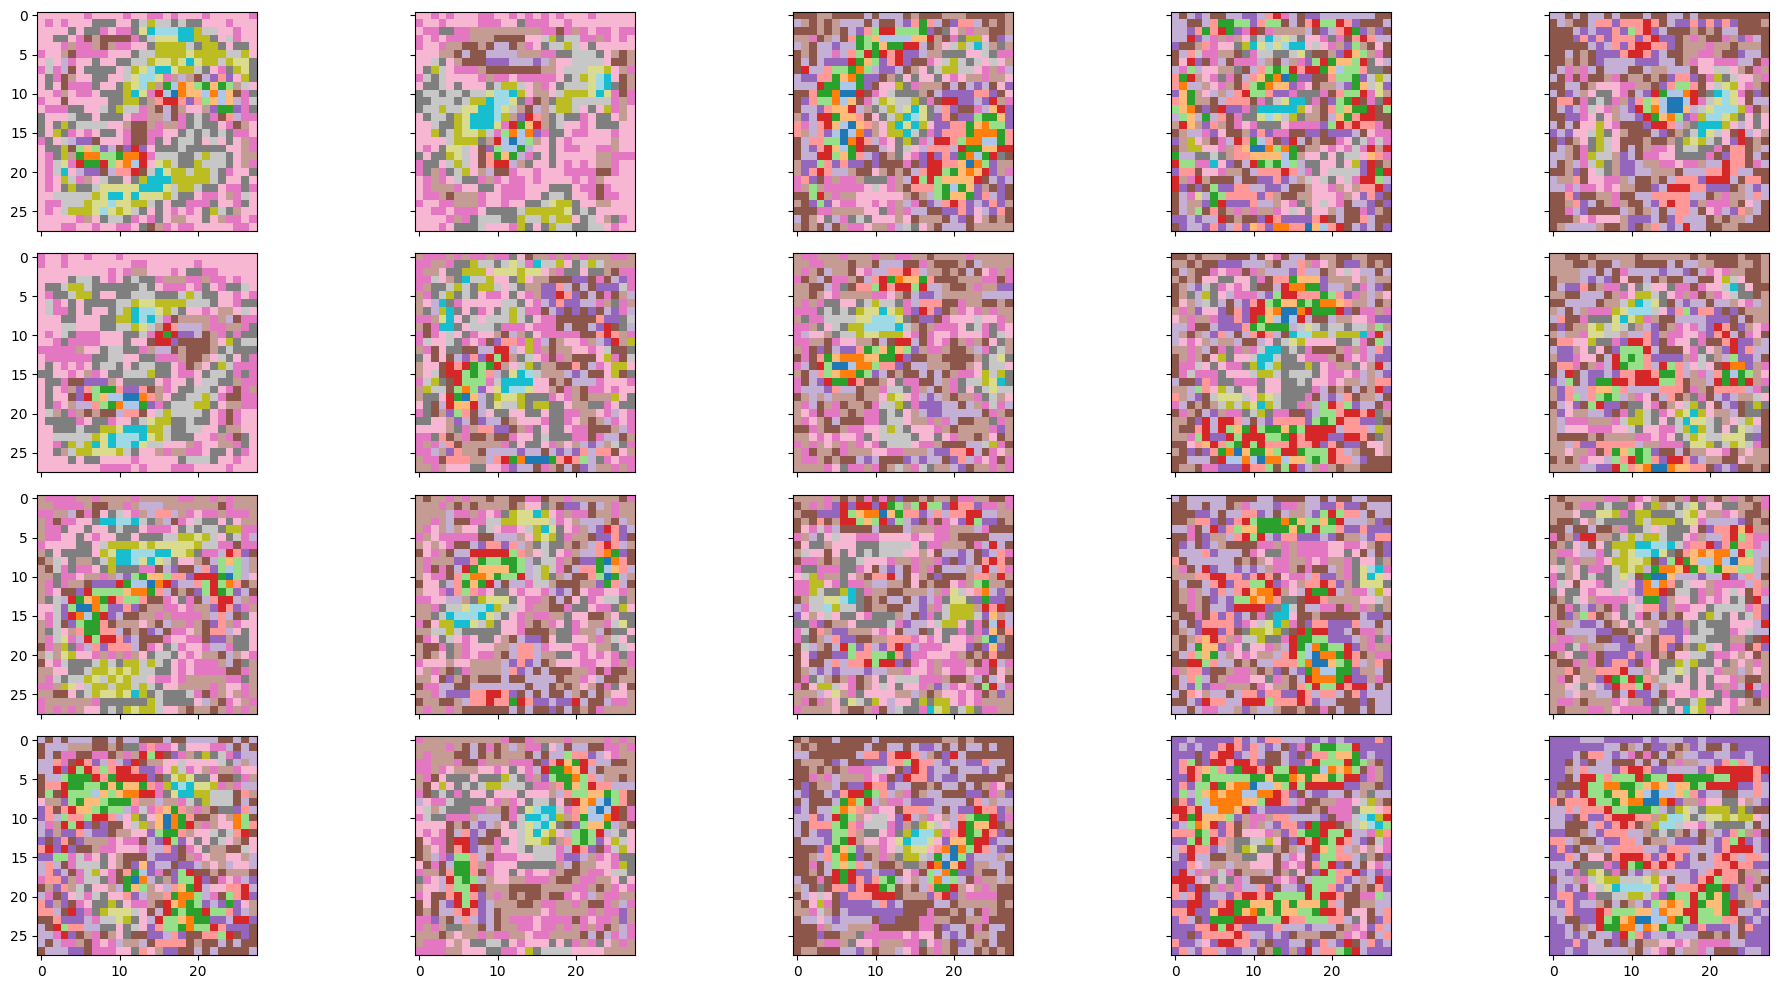

In [87]:
plot_samples(imgs, n=20)